In [1]:
import pandas as pd

In [2]:
endpoints = ['do-register', 'add-company', 'get-stock-data', 'get-stock-users-and-companies', 'add-buy-offer', 'add-sell-offer']
dataToPlot = ['apiTime', 'queueSizeForward']
folders = ['3600s']

In [11]:
hardware = '8CPU_20RAM'

In [9]:
hardware = '12CPU_30RAM'

In [18]:
tests = ['2repl', '4repl', '6repl', '8repl', '10repl']

In [24]:
tests = ['trans_60s', 'trans_120s', 'trans_180s', 'trans_240s', 'trans_300s']

In [4]:
tests = ['req_20ms', 'req_100ms', 'req_500ms', 'req_1000ms', 'req_2000ms']

In [6]:
tests = ['A1_100-A2_100-A3_100', 'A1_200-A3_100', 'A2_200', 'A2_200-A3_100', 'A3_200']

c:\users\rafal\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


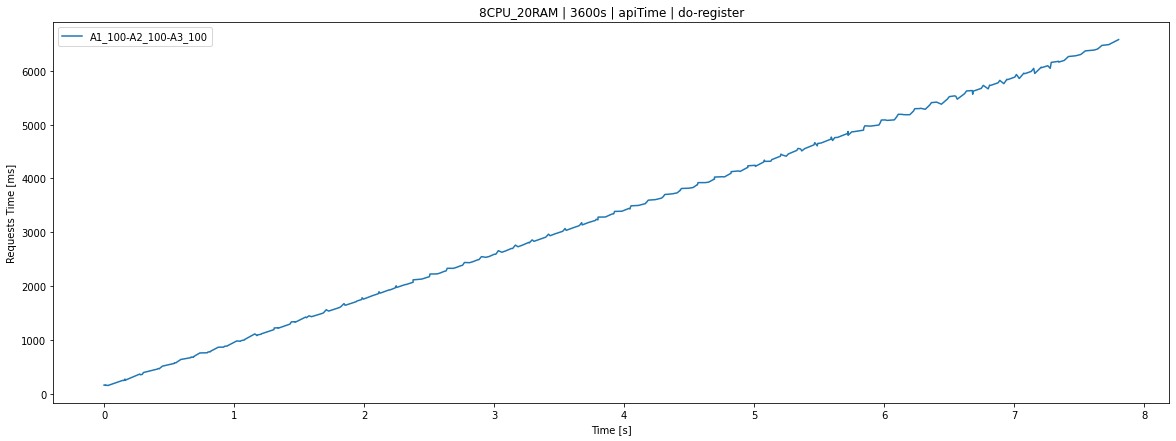

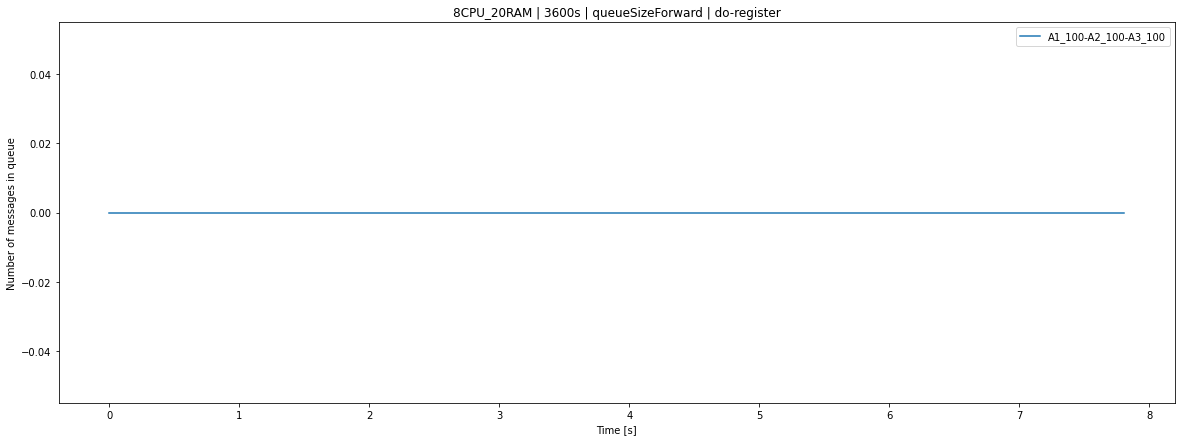

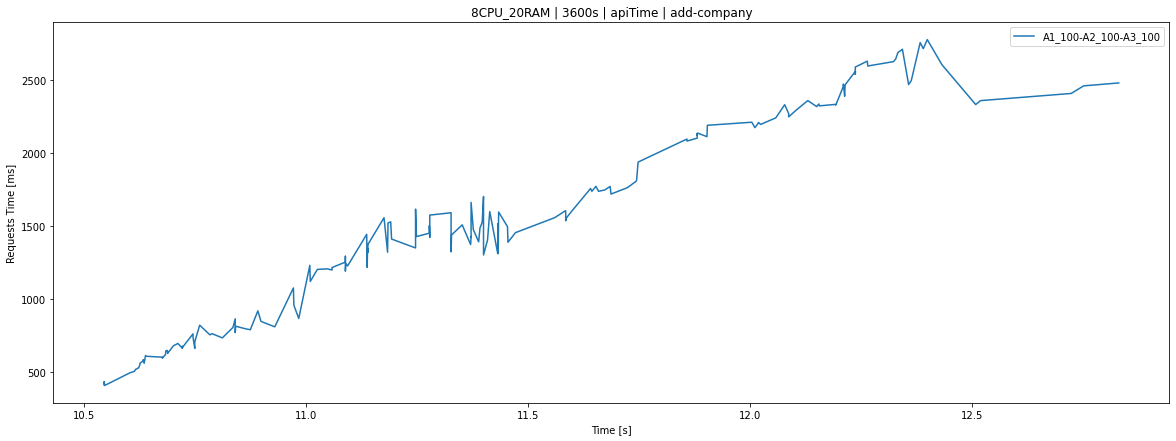

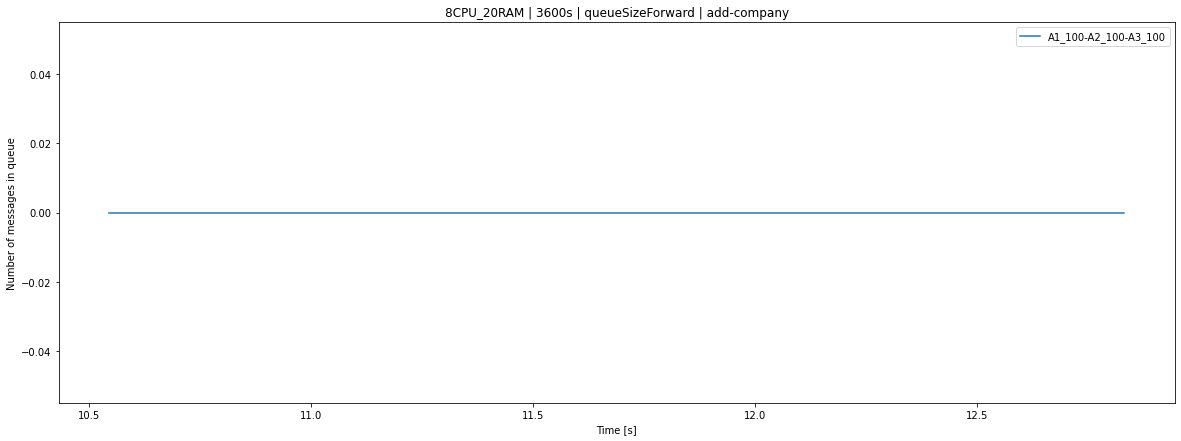

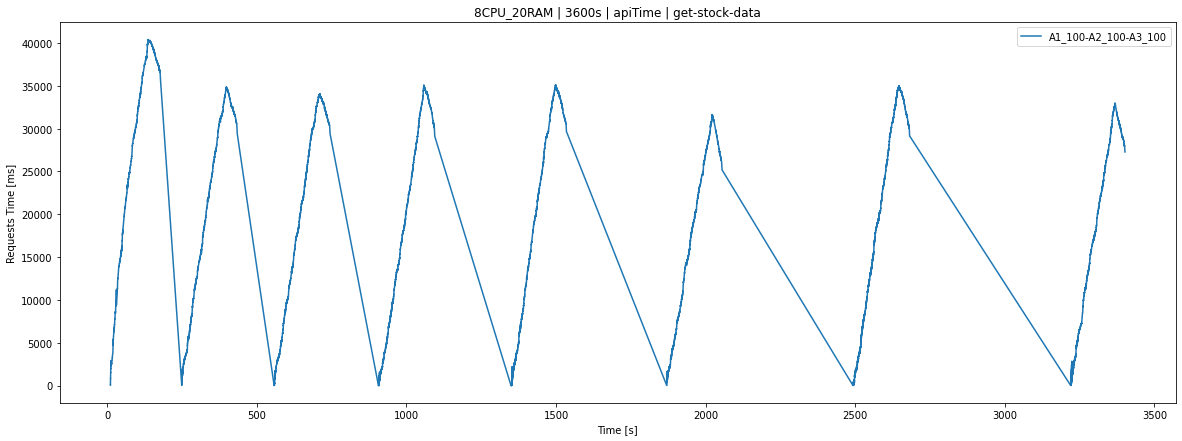

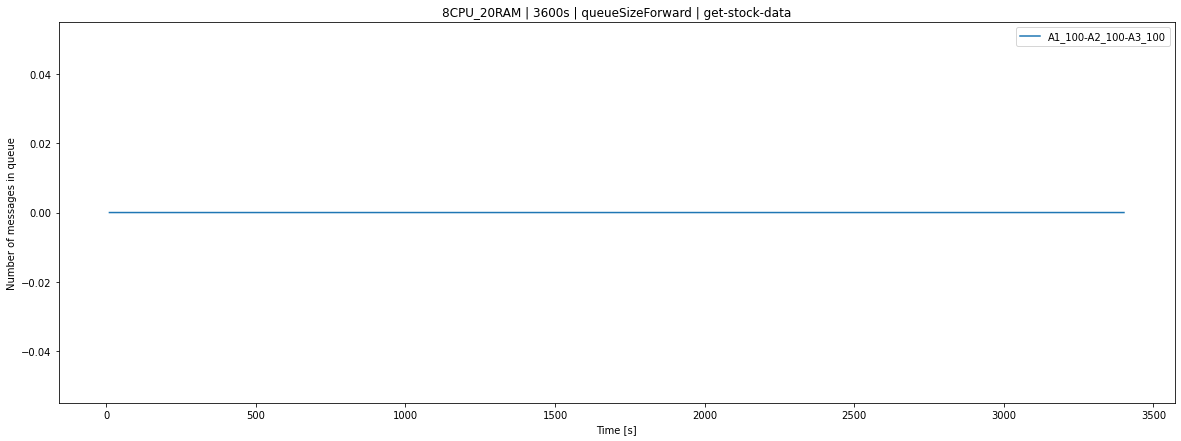

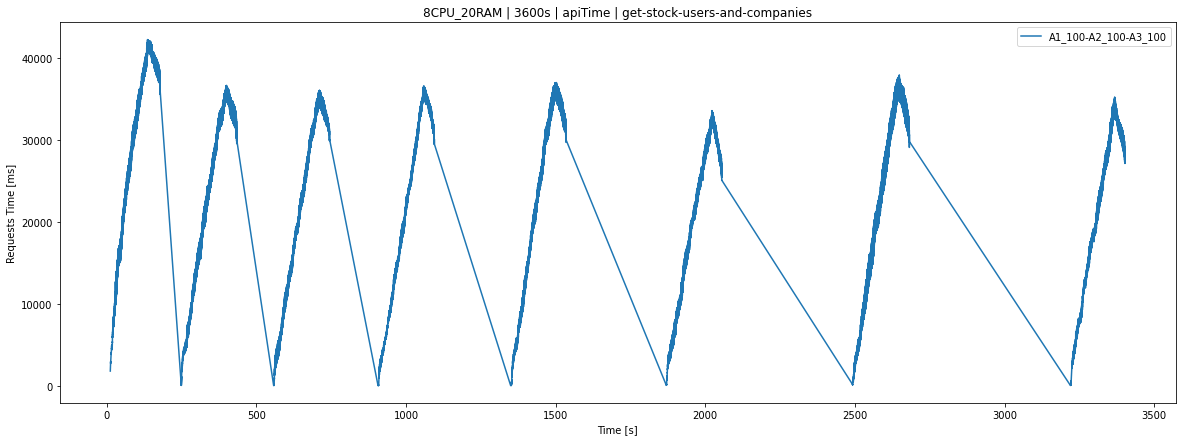

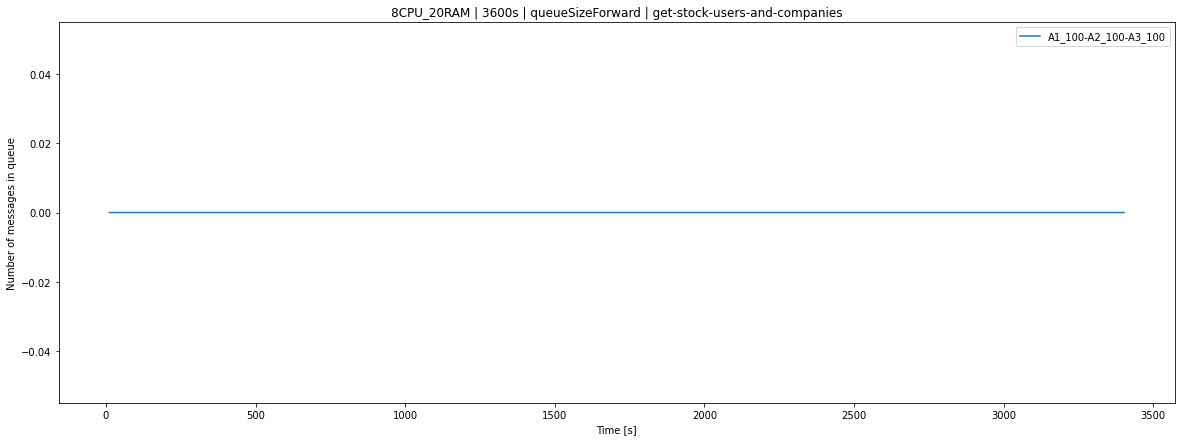

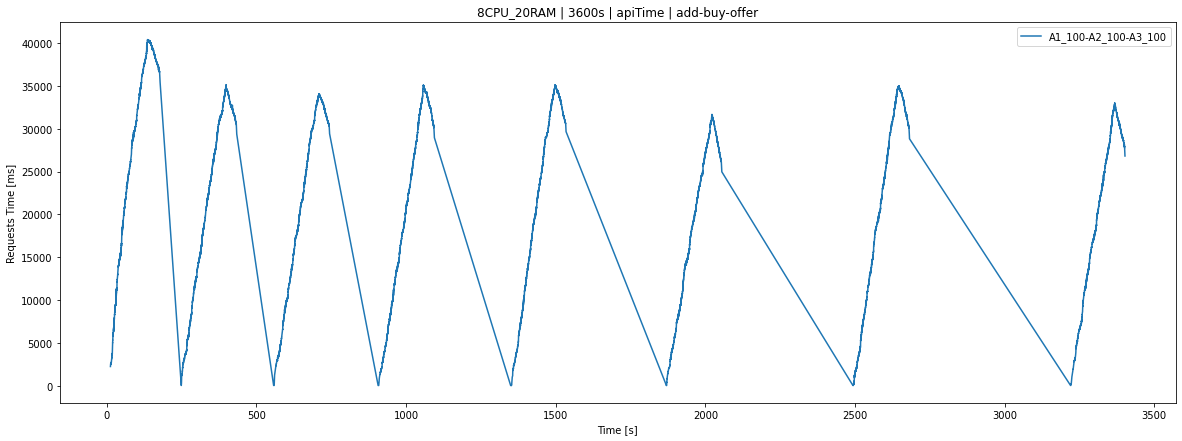

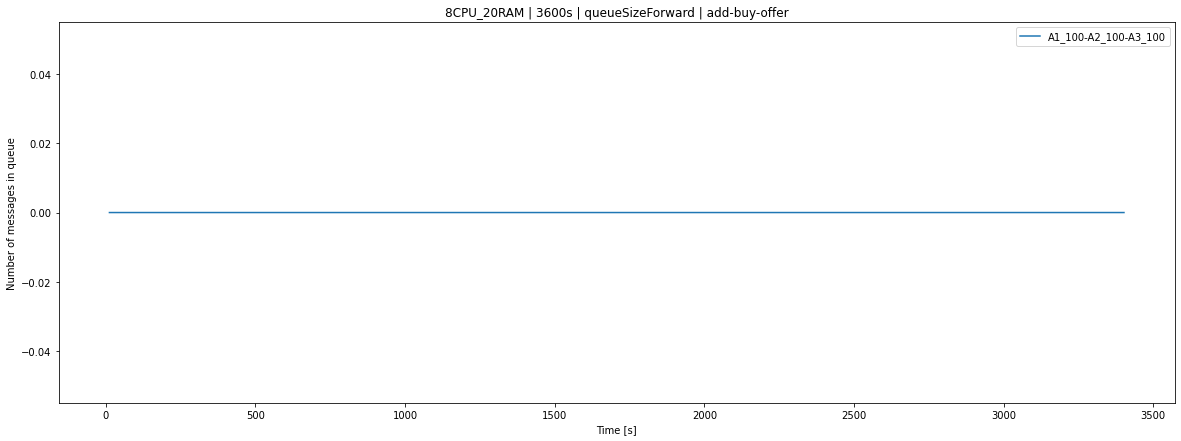

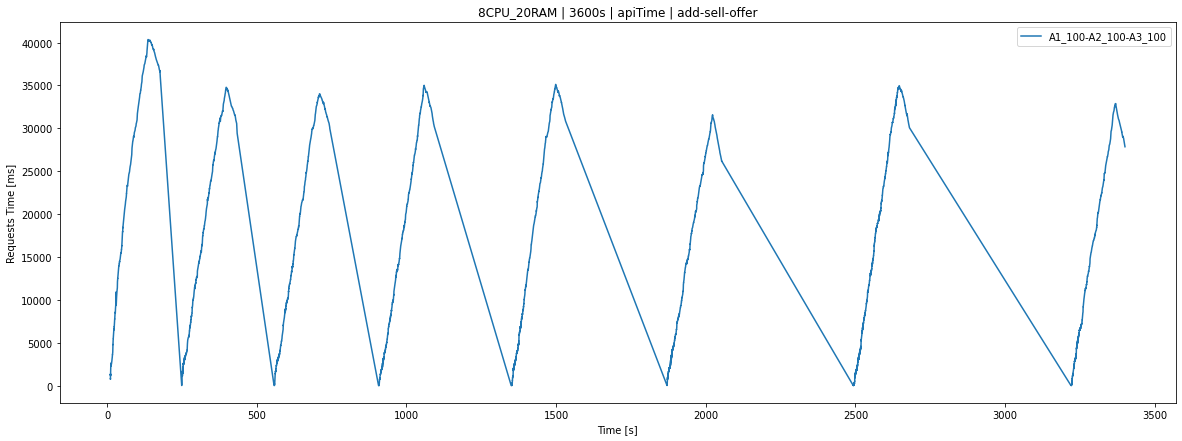

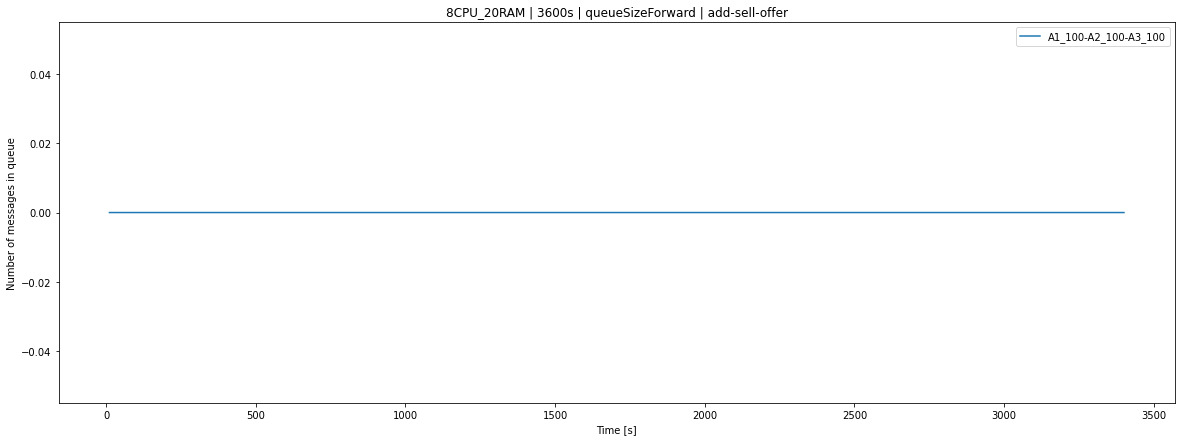

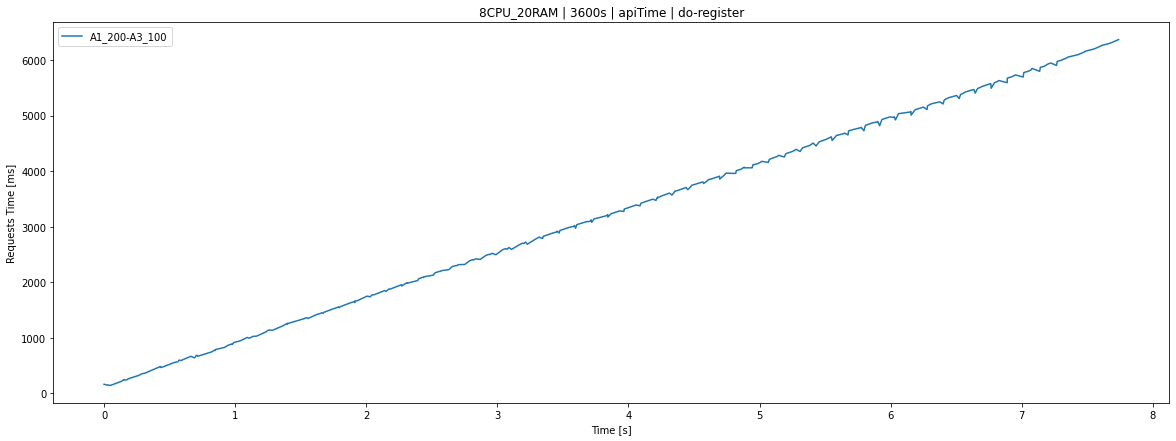

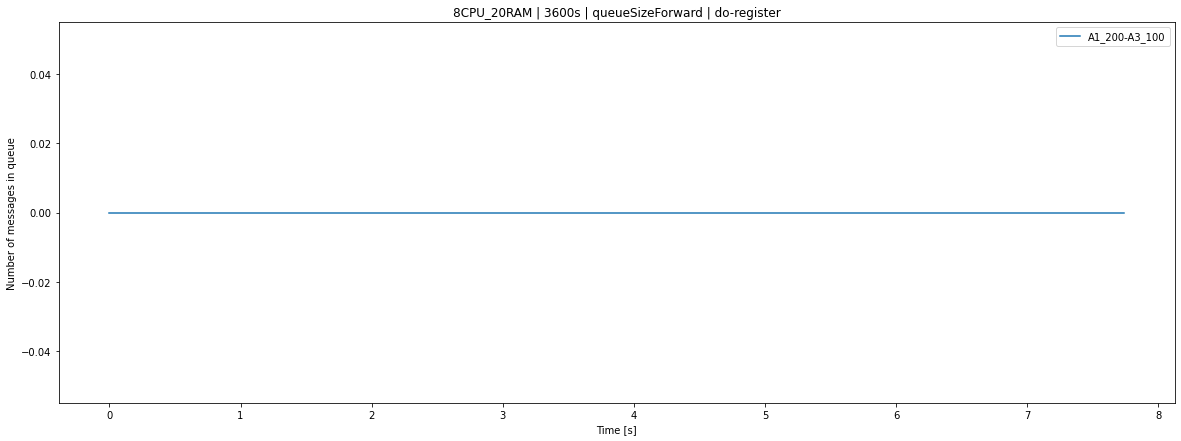

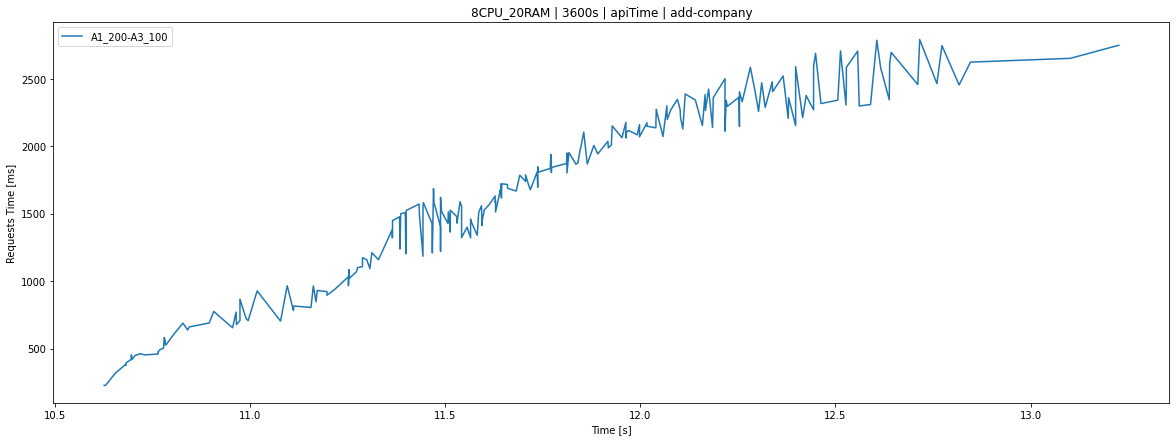

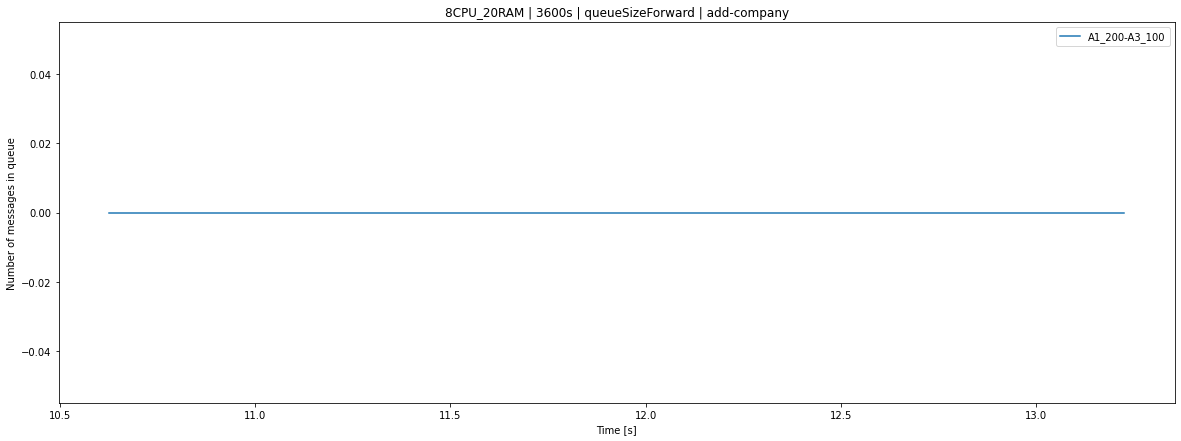

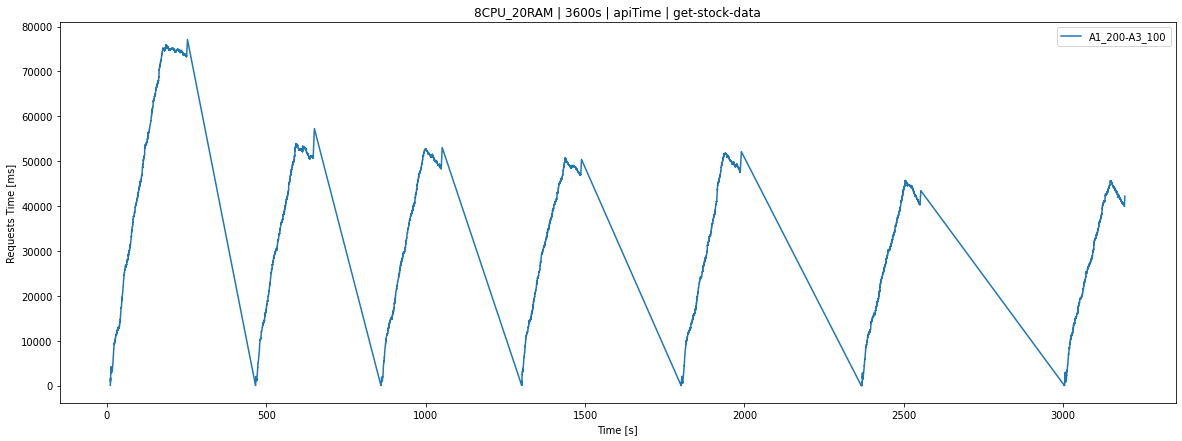

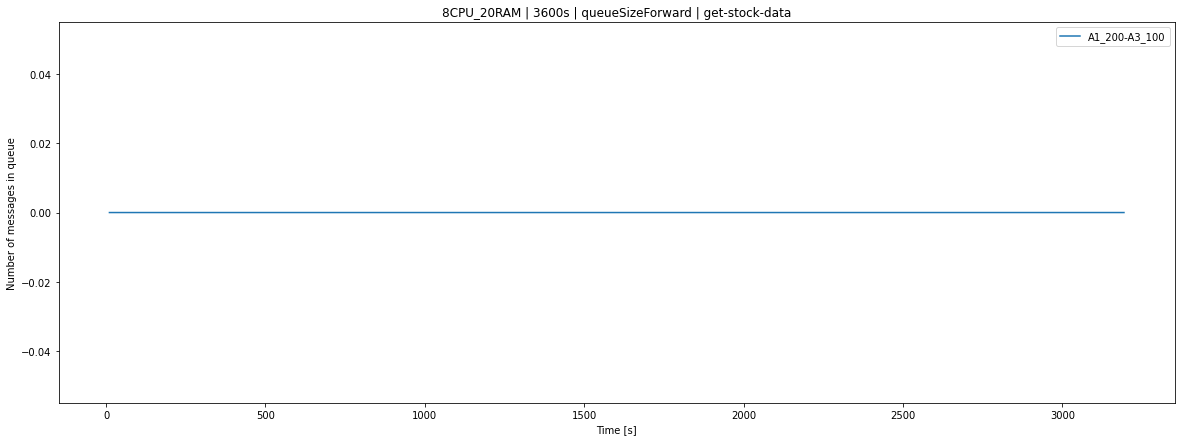

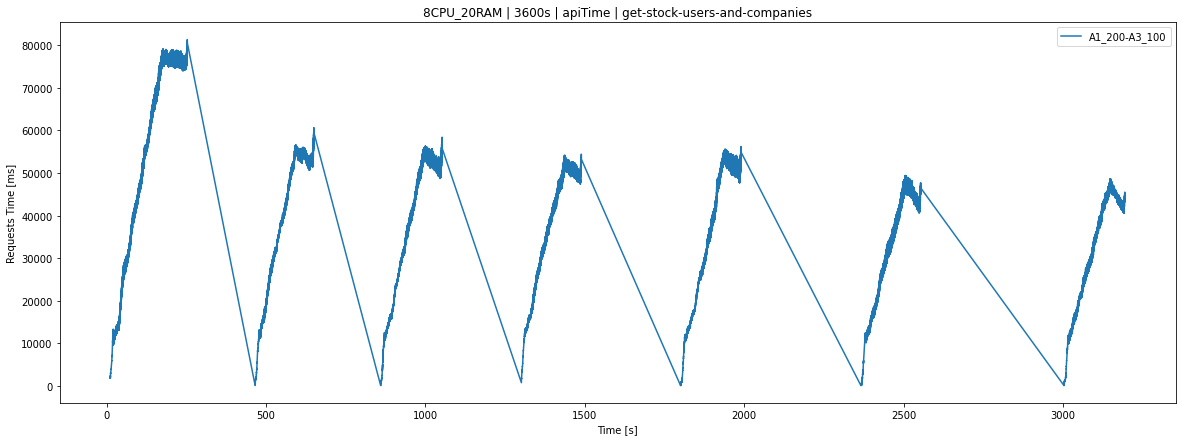

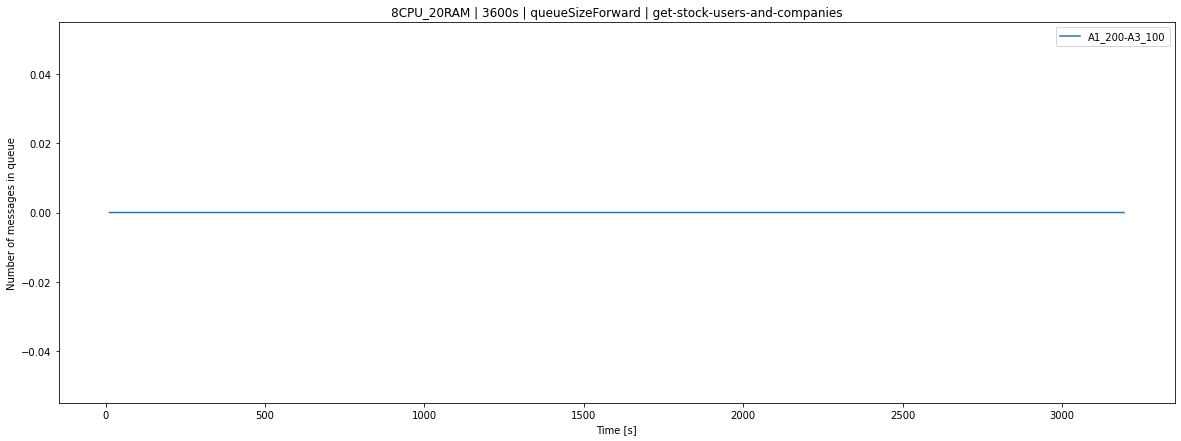

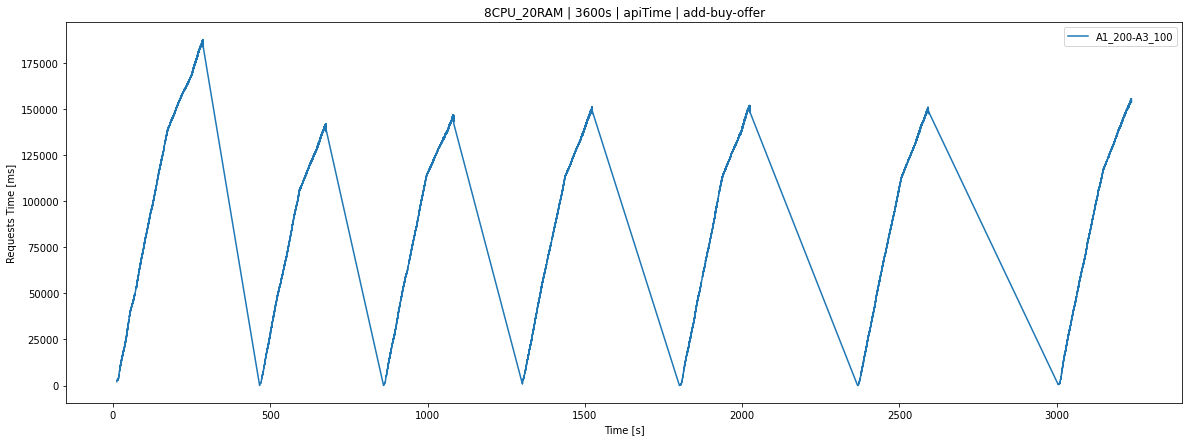

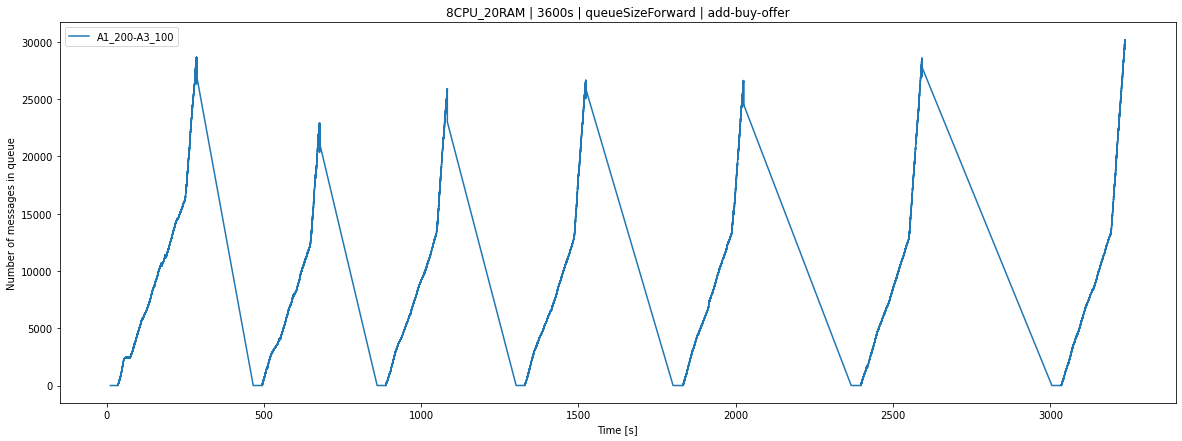

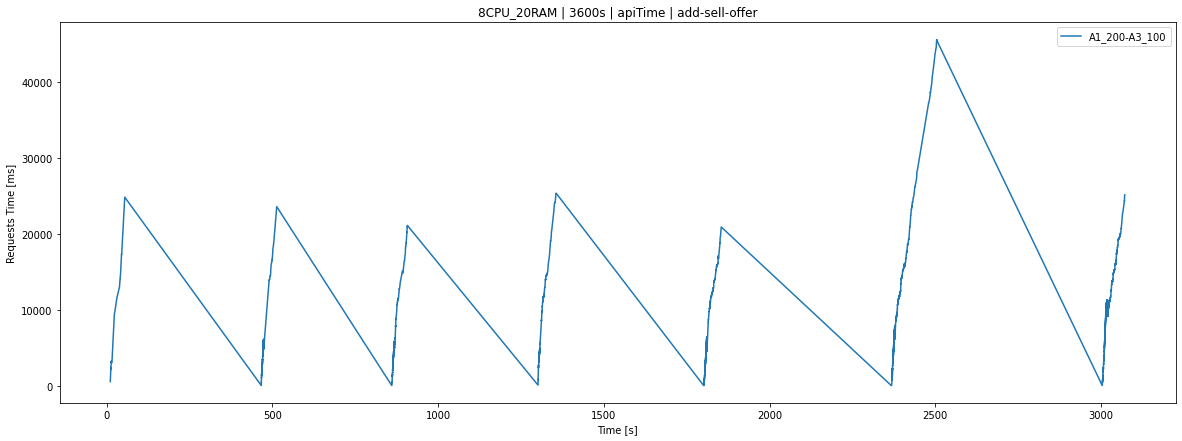

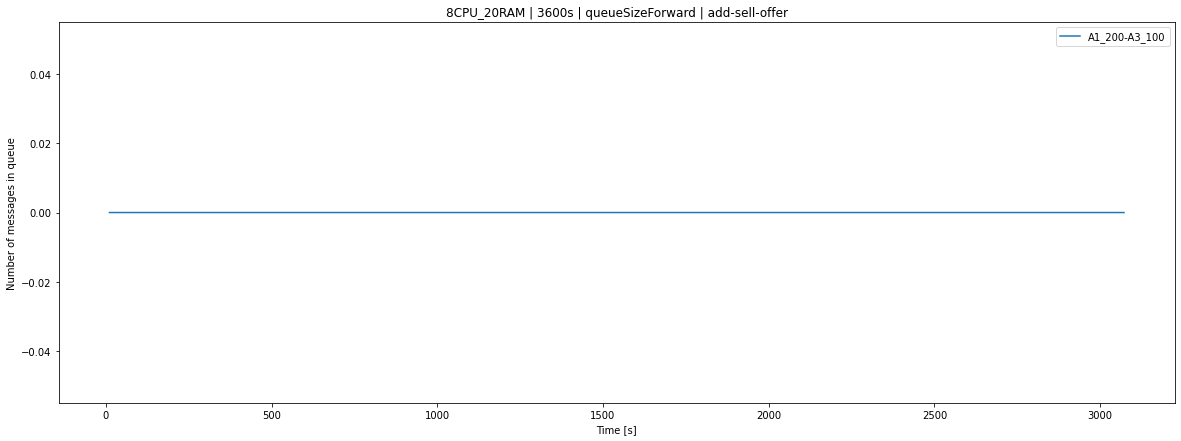

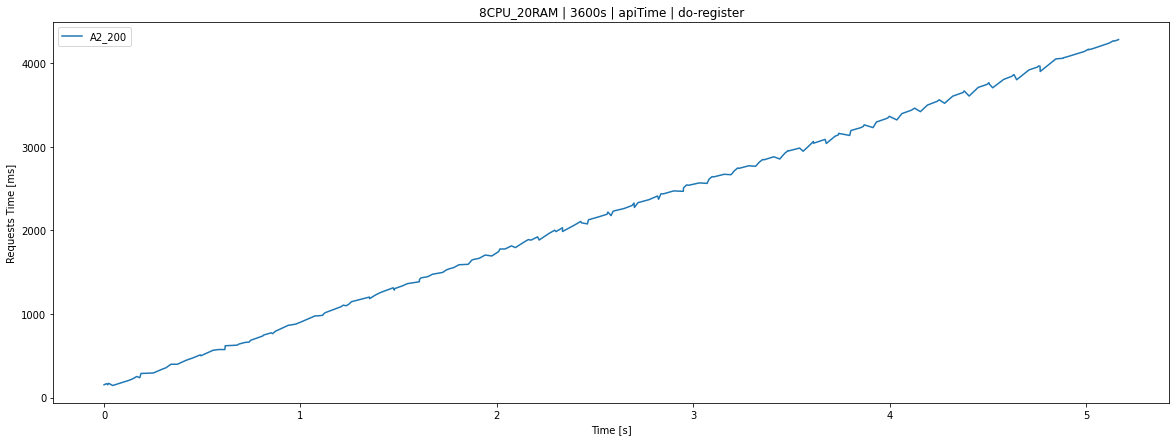

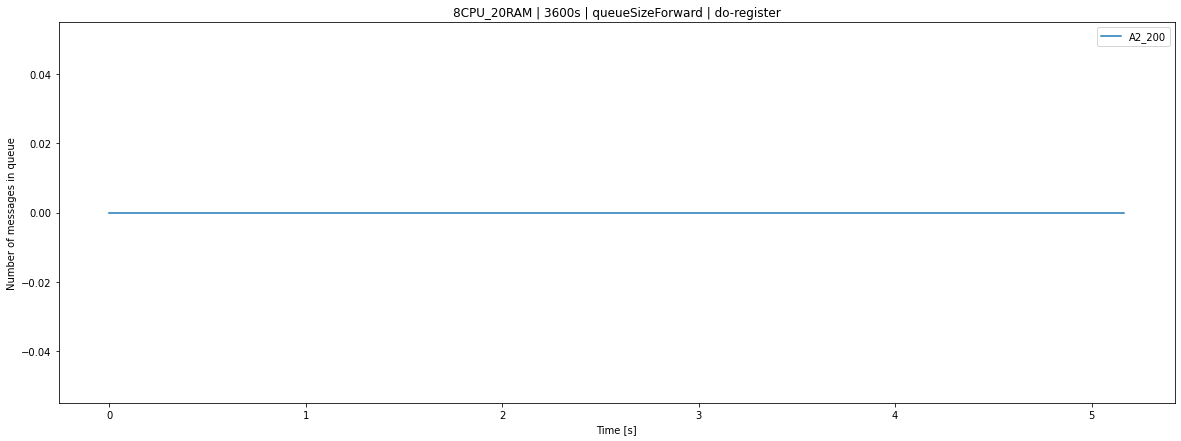

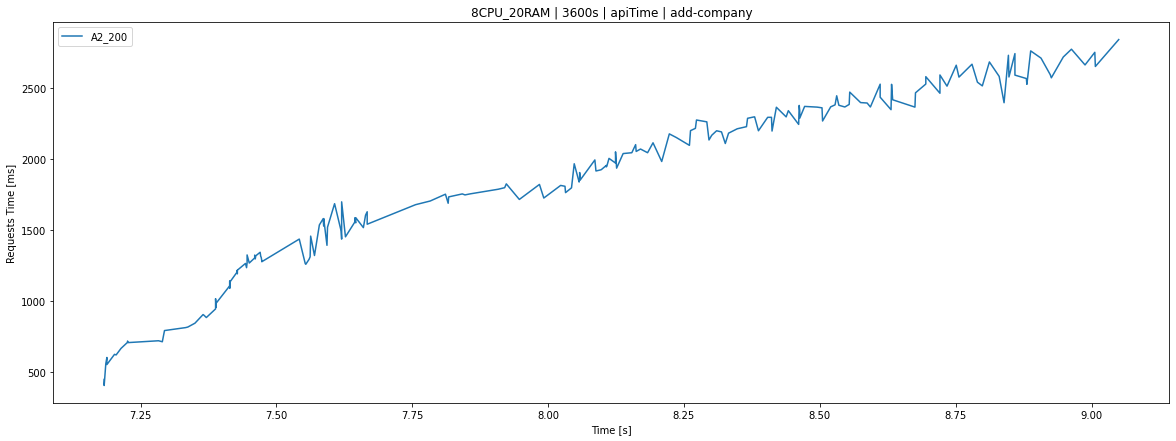

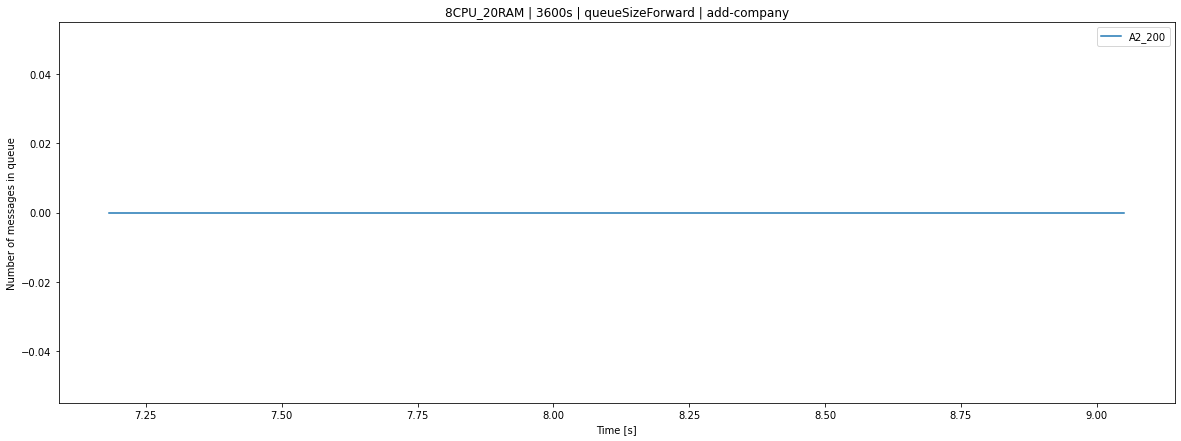

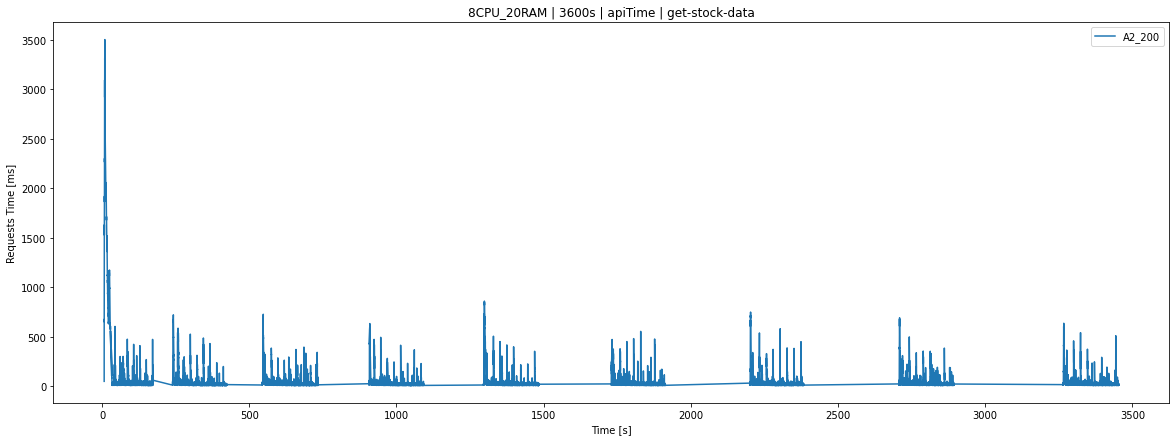

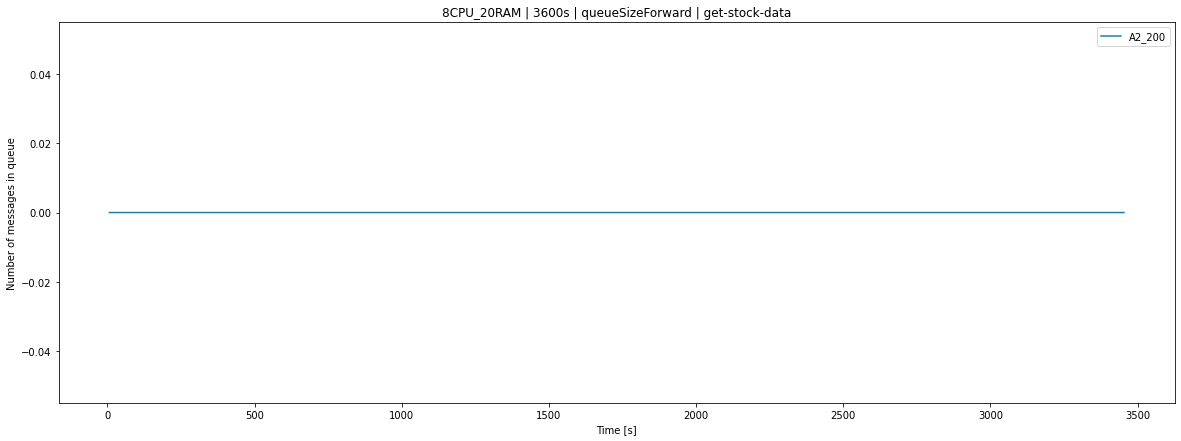

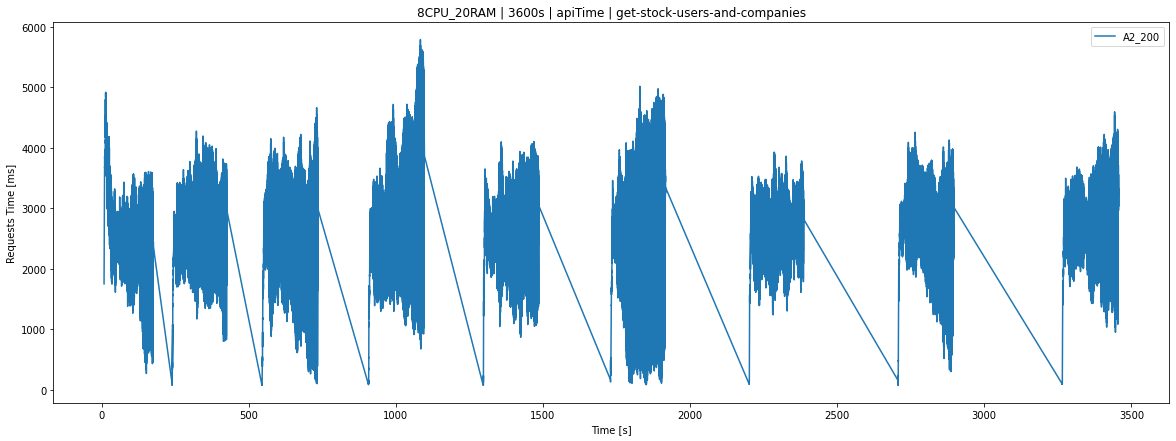

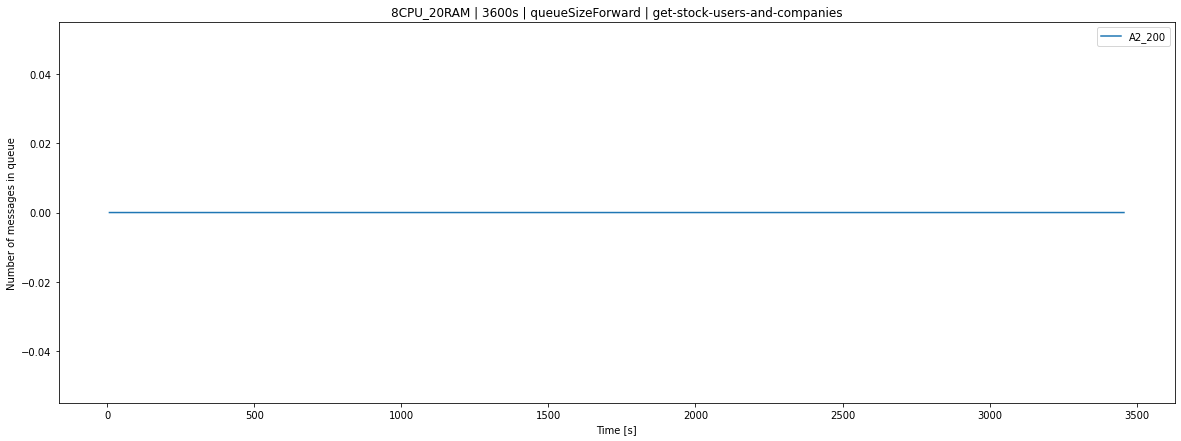

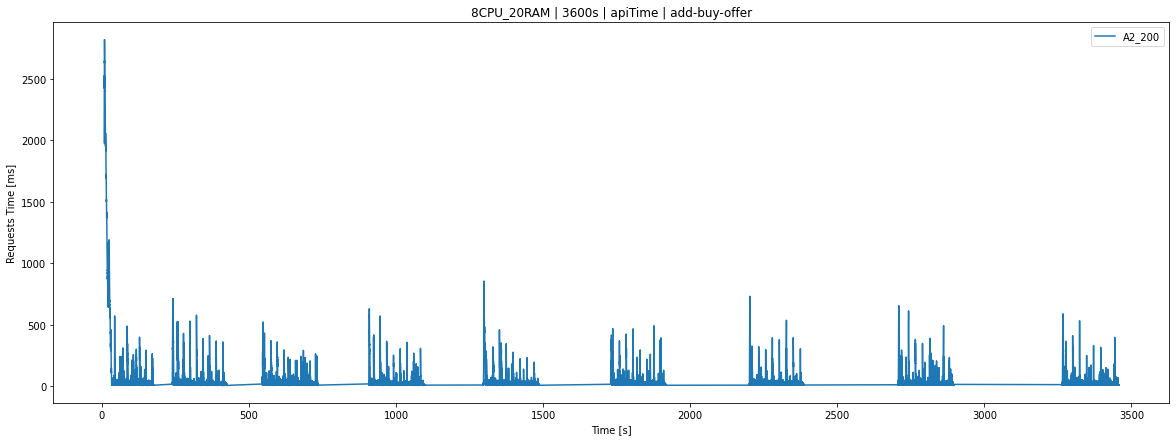

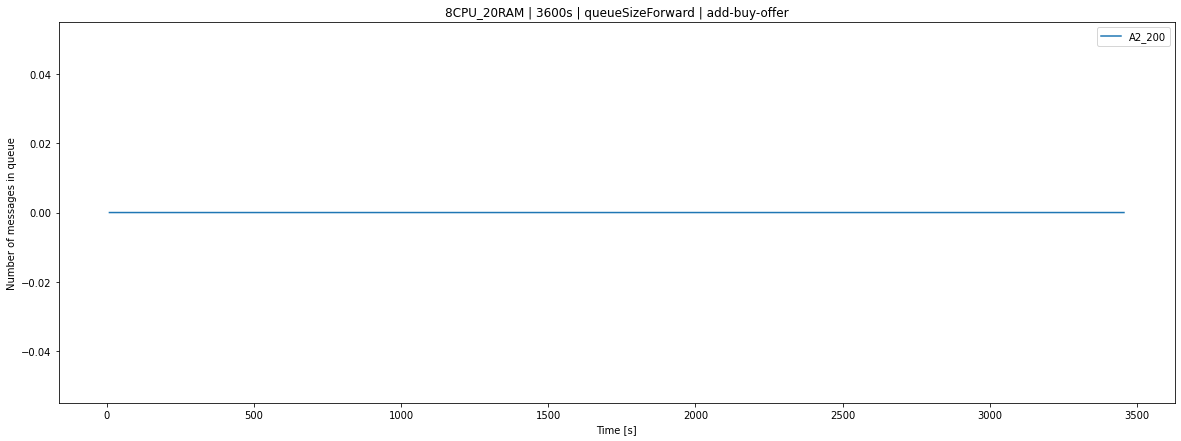

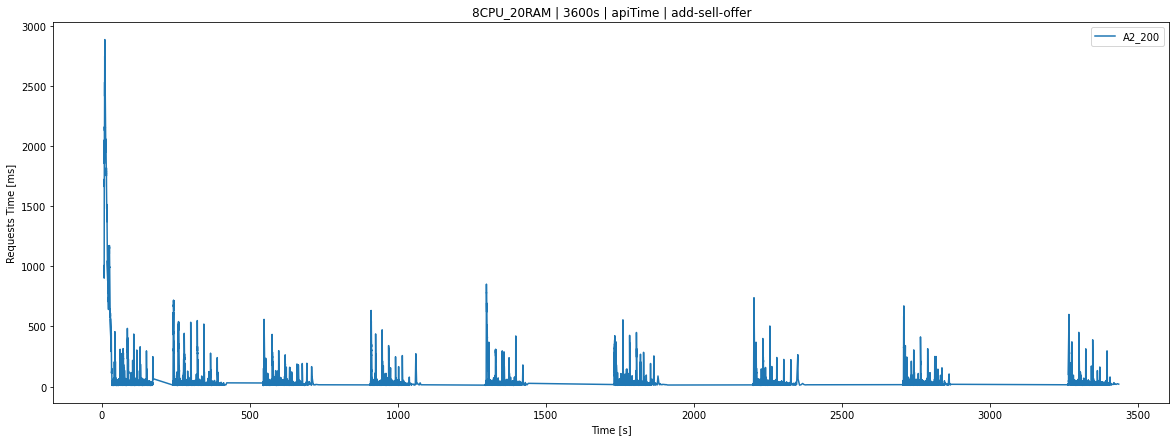

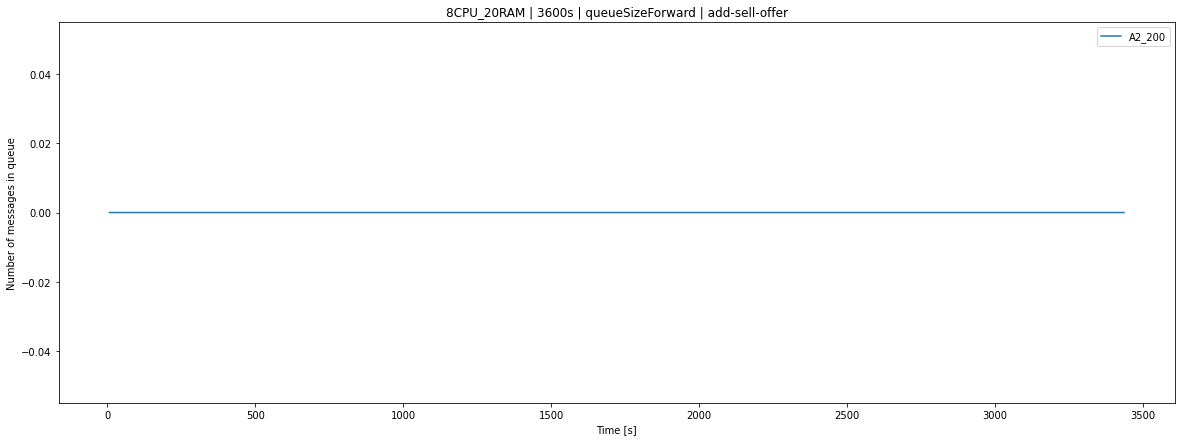

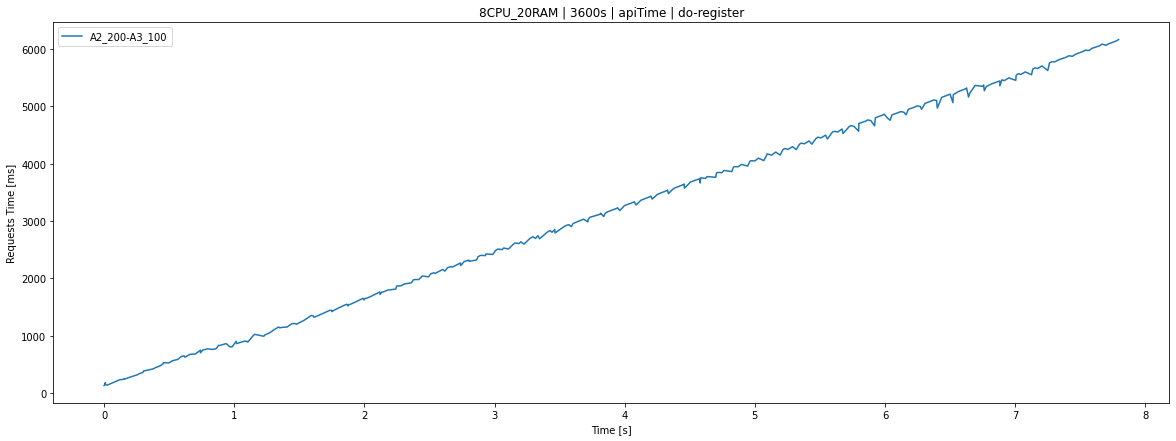

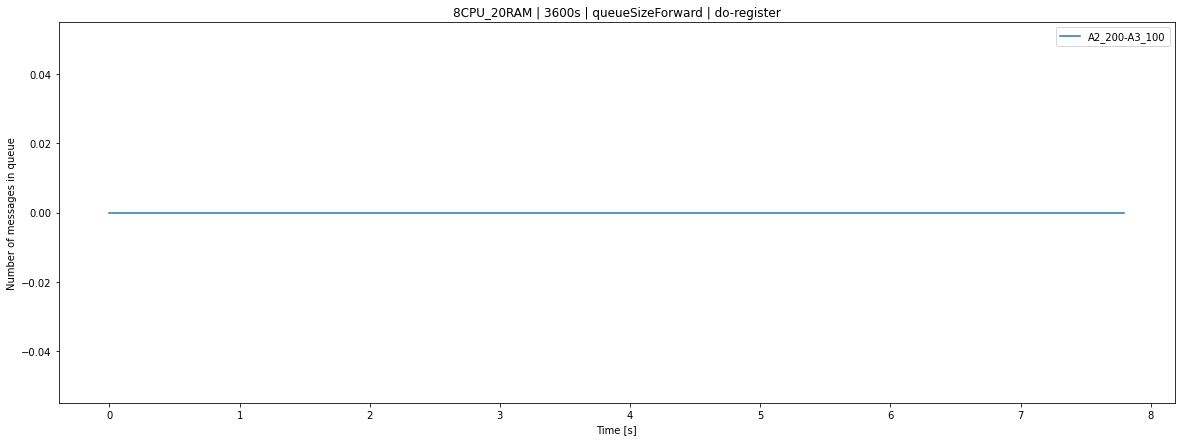

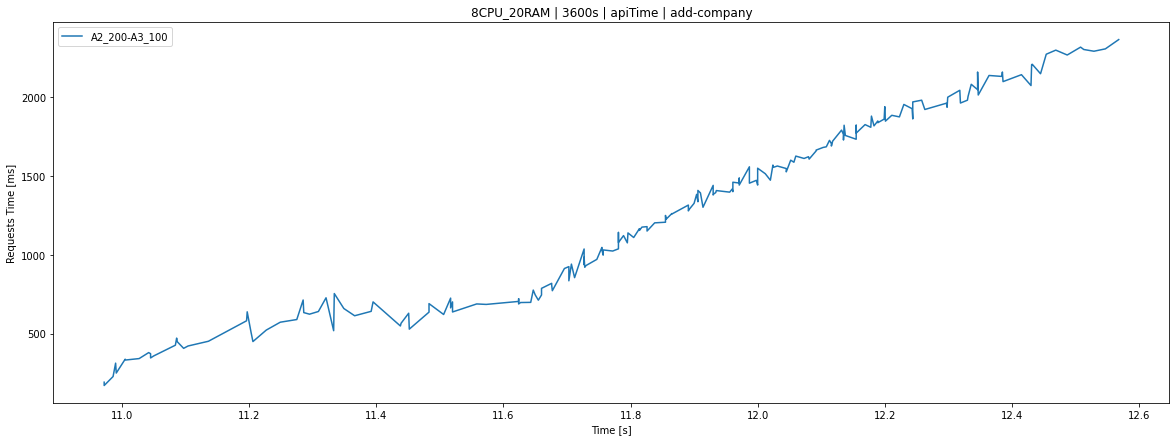

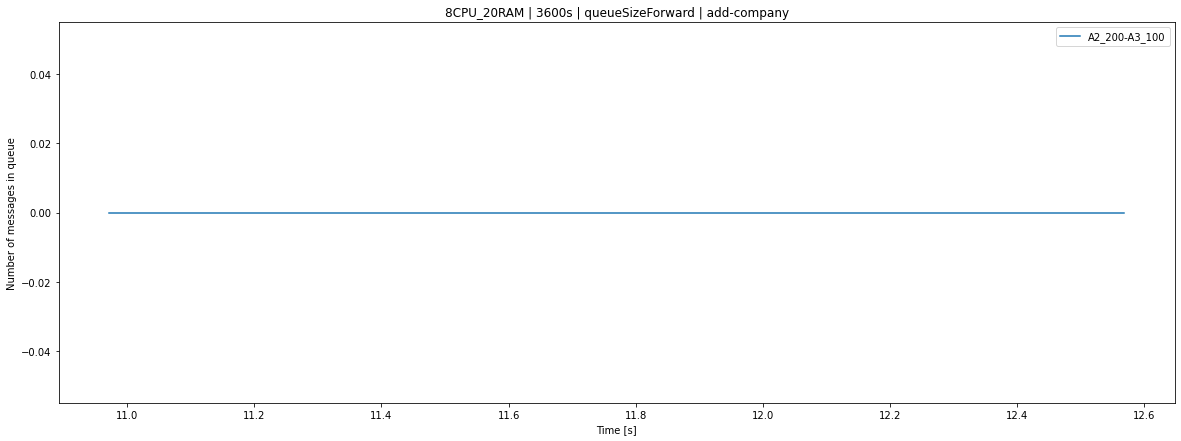

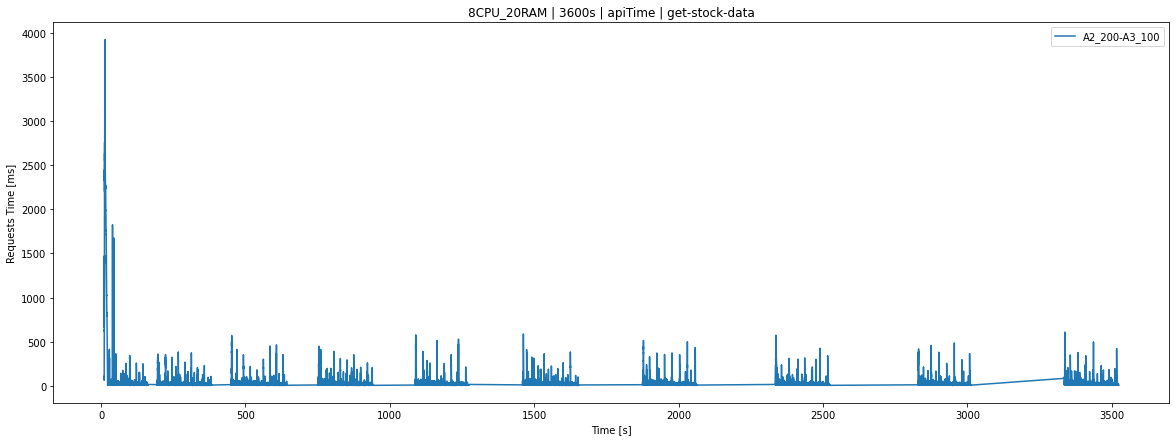

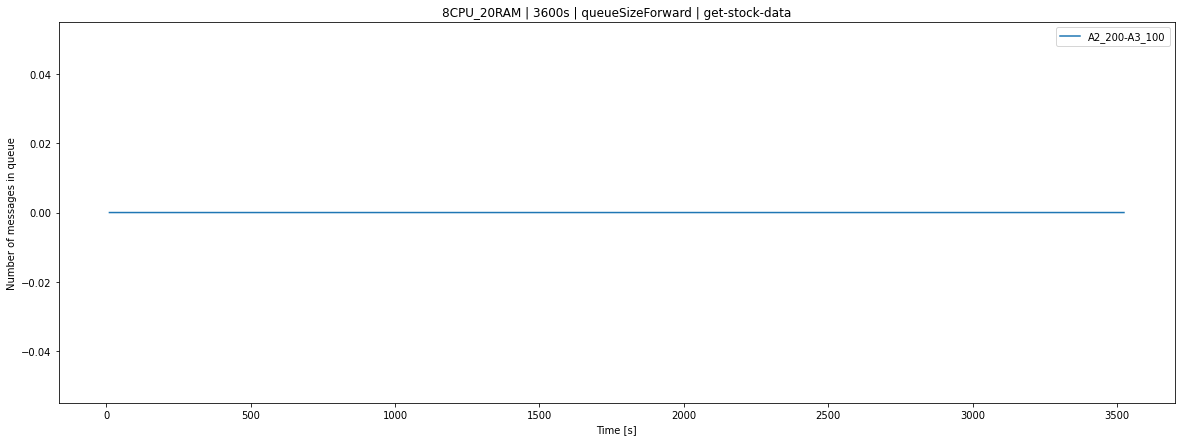

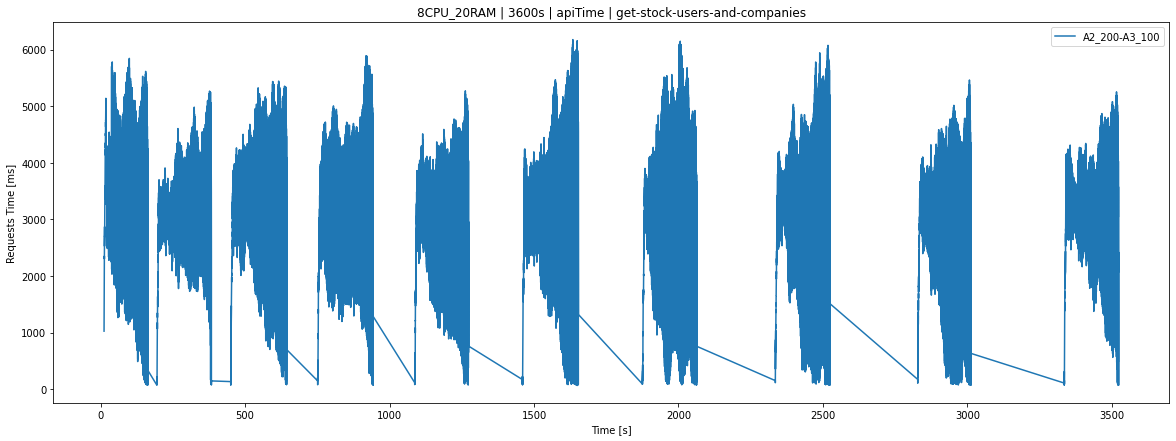

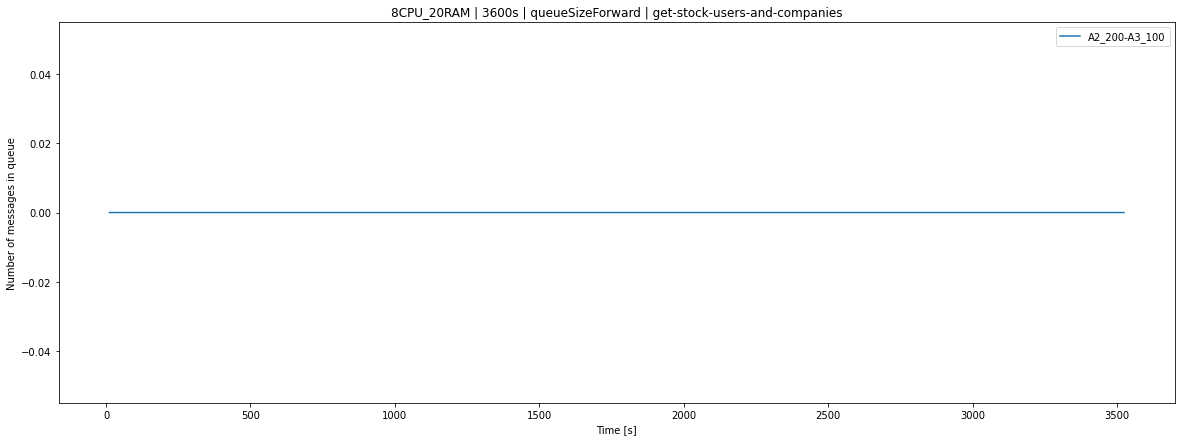

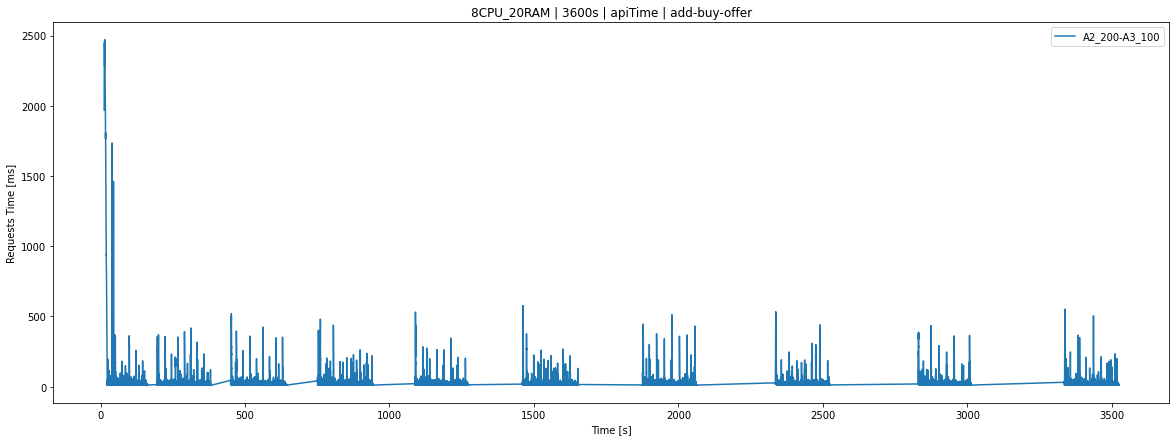

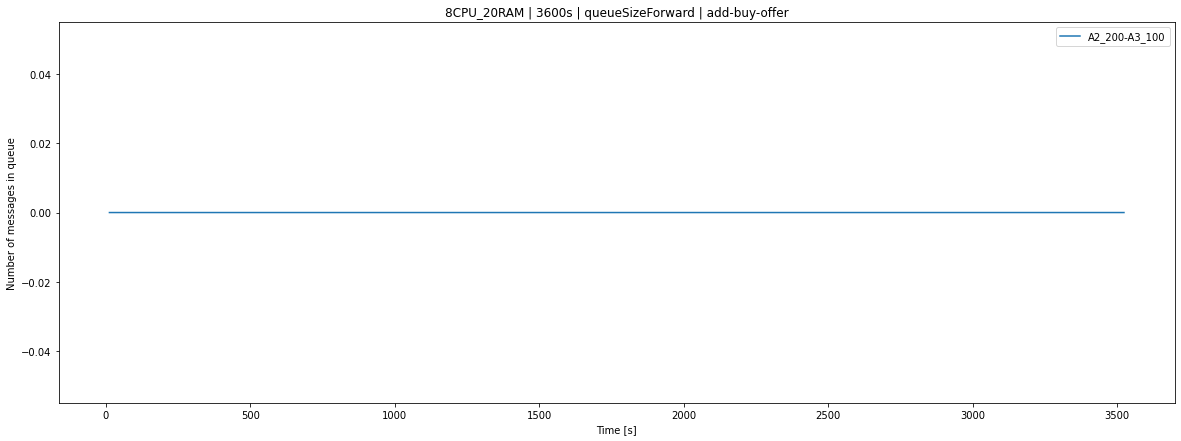

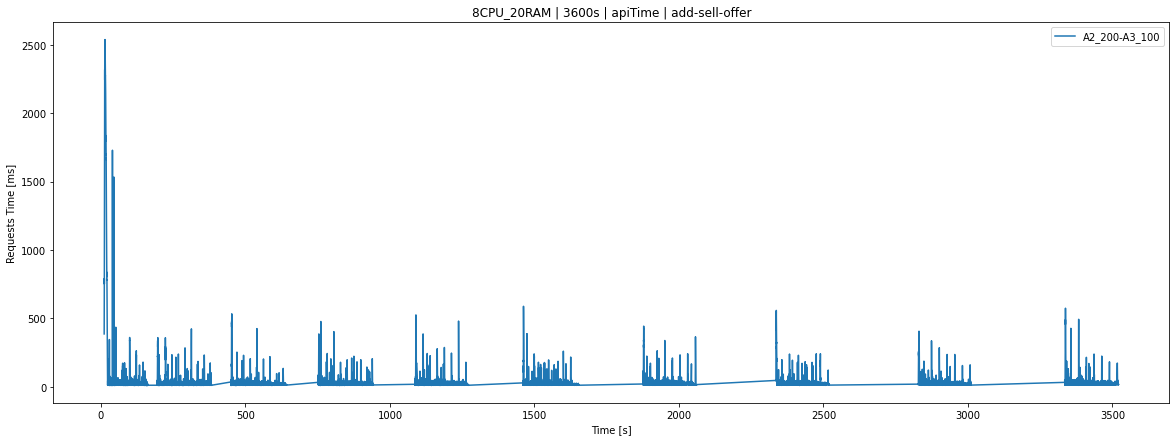

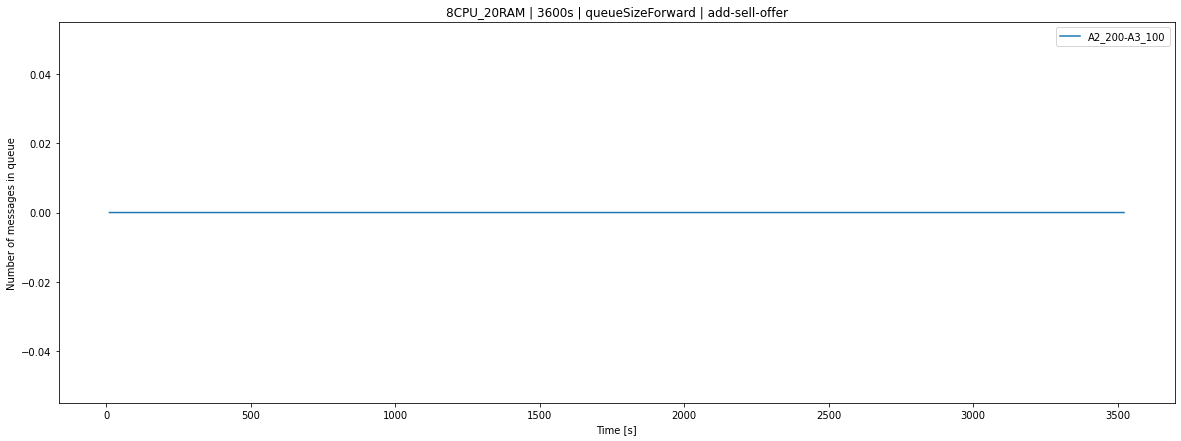

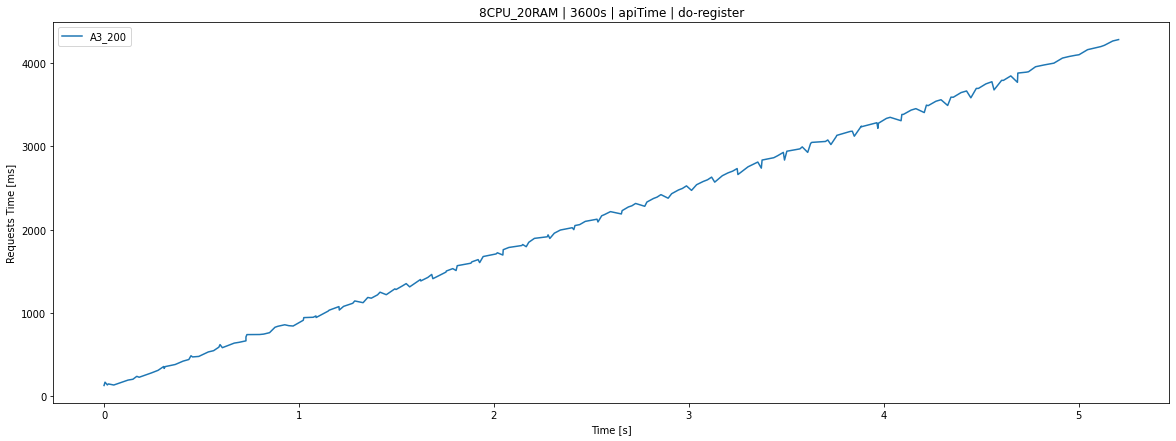

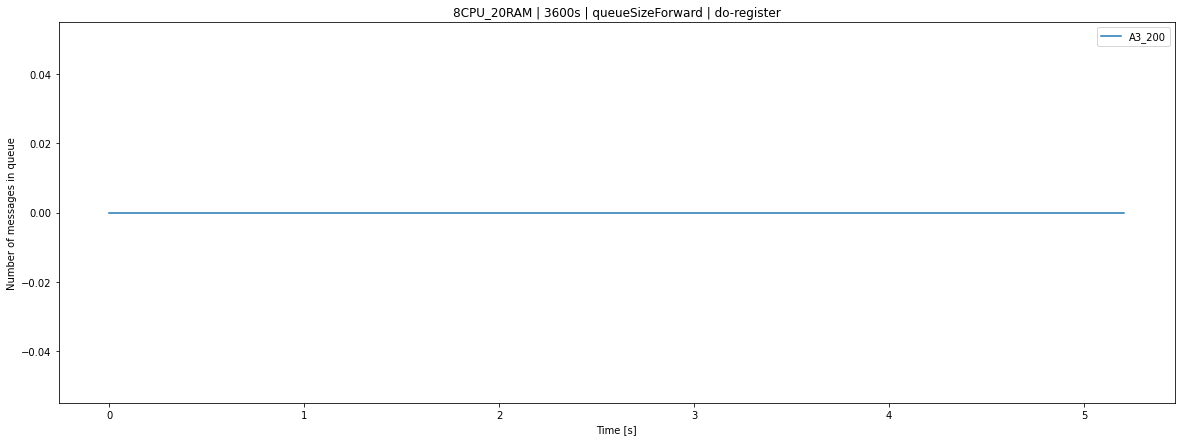

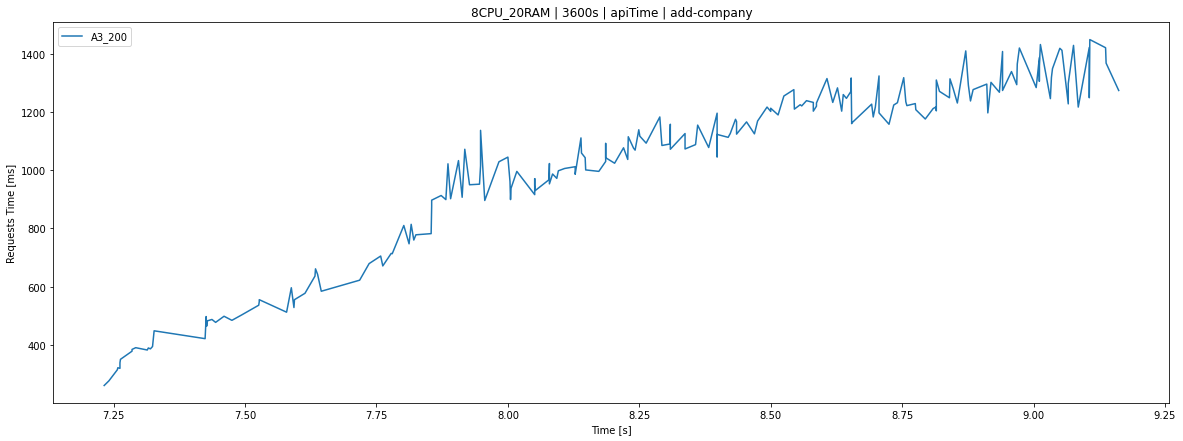

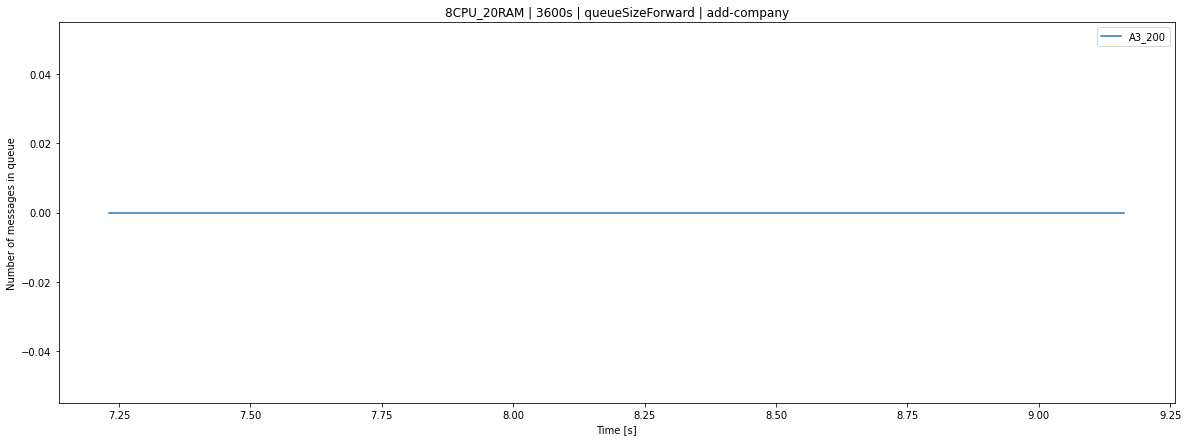

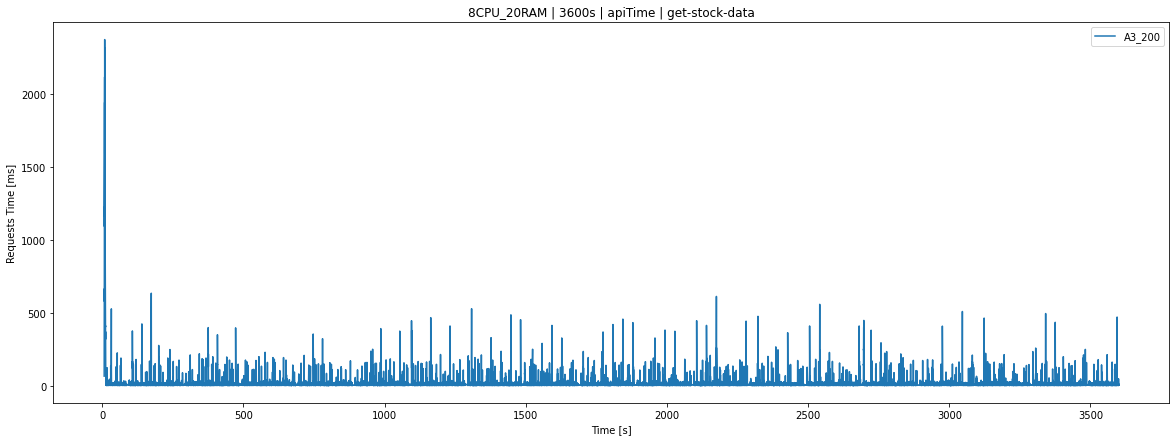

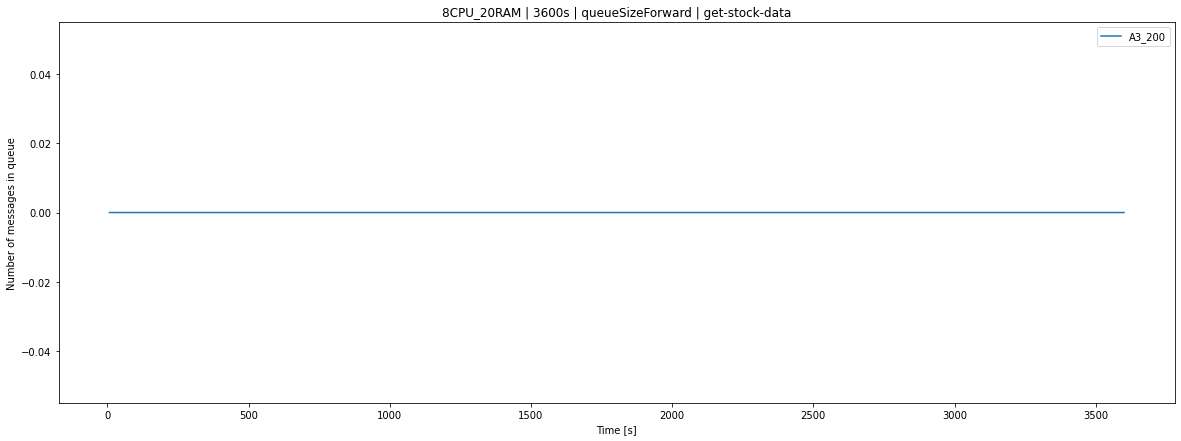

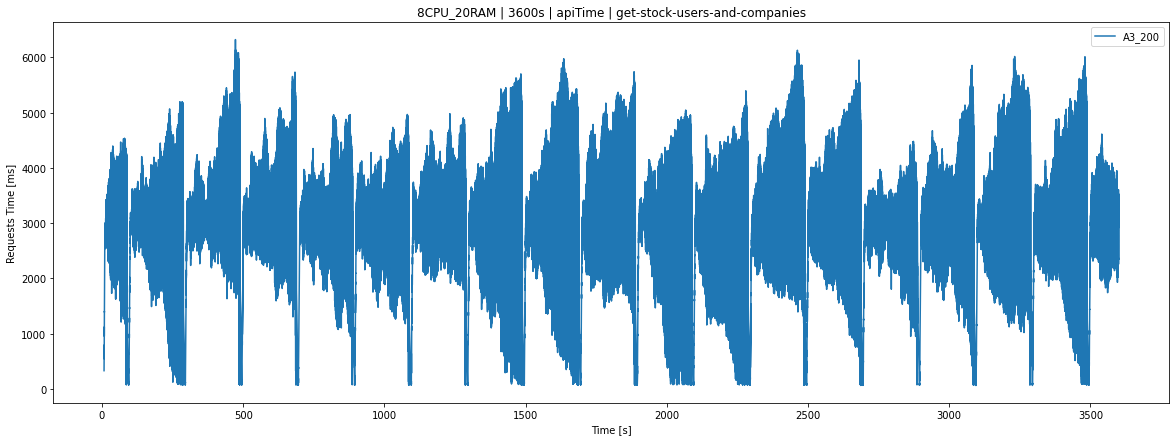

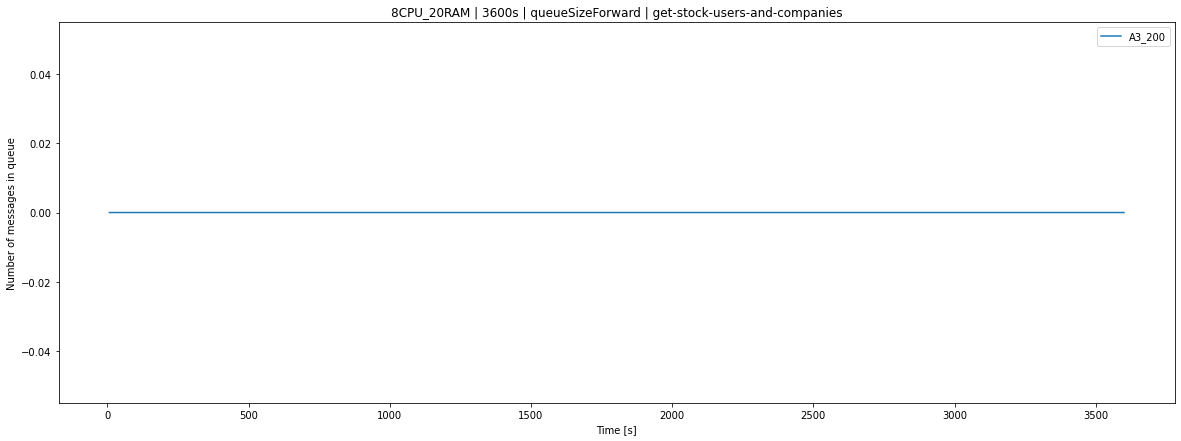

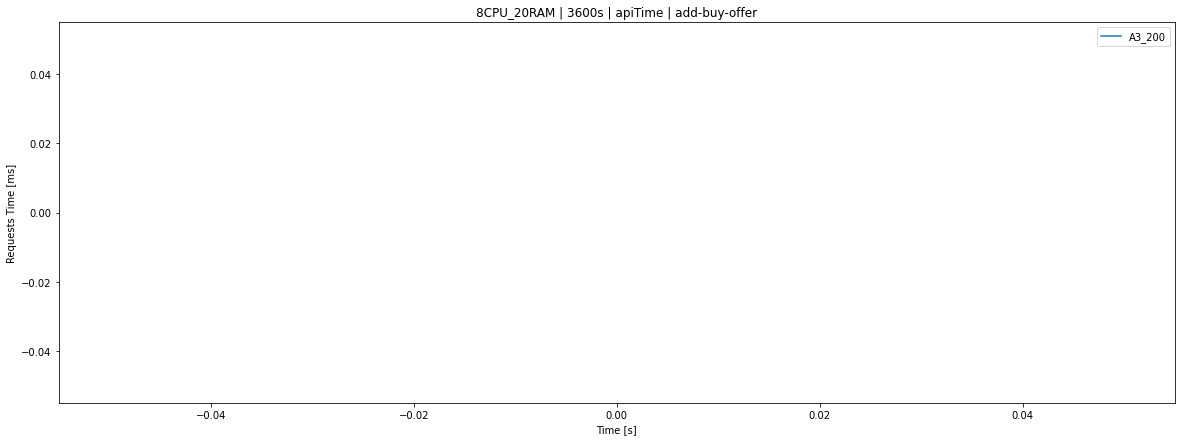

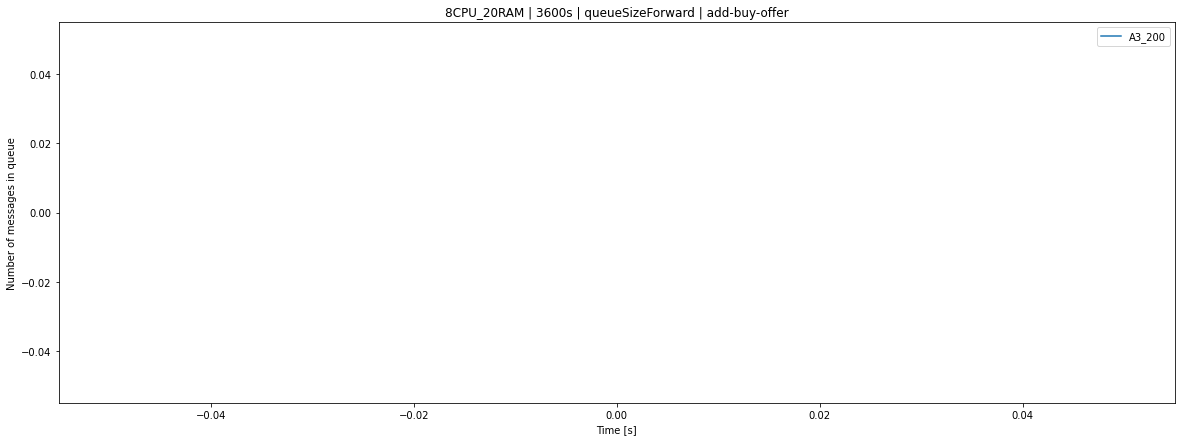

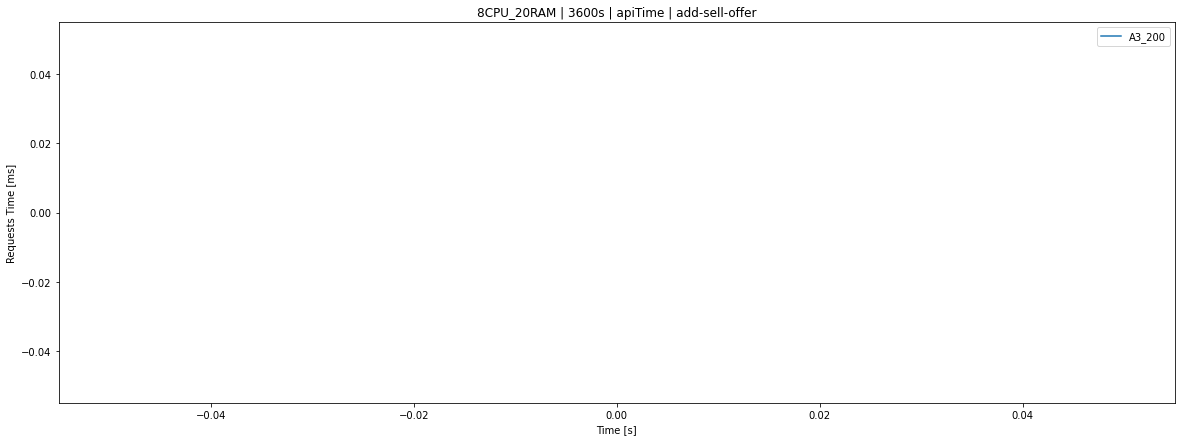

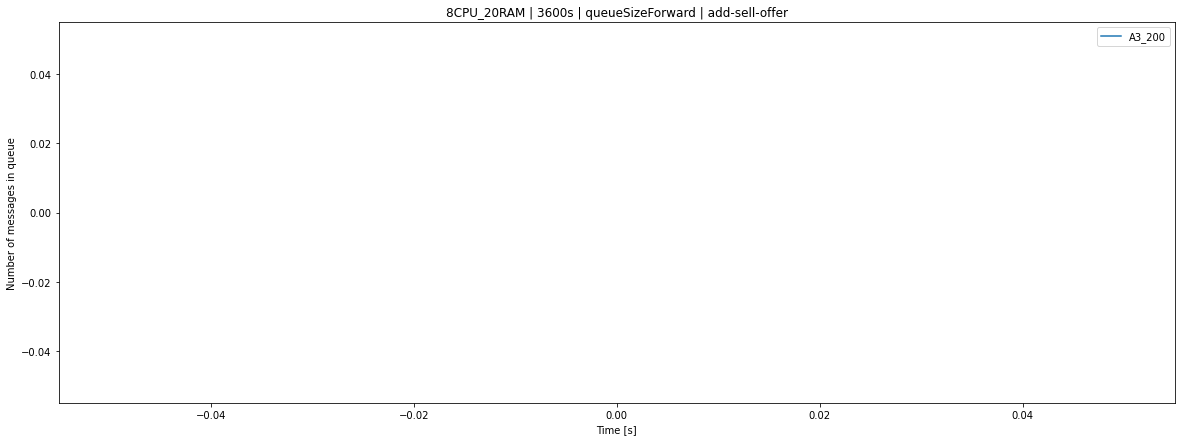

In [12]:
for f in folders:
    for i in tests:
        try:
            d = pd.read_csv(hardware + '/' + f + '/' + i + '/methods.csv')
        except:
            continue
        for e in endpoints:
            for j in dataToPlot:  
                data = pd.DataFrame()
                d = d.sort_values(by=['timestamp'])
                t = d['timestamp'][0]
                d['Time [s]'] = d['timestamp'].apply(lambda x: (x - t)/1000)
                customDataFrame = pd.DataFrame({'Time [s]': d[(d['endpointUrl'] == e)]['Time [s]'], i: d[(d['endpointUrl'] == e)][j]})
                customDataFrame = customDataFrame.loc[customDataFrame['Time [s]'] < 3600]
                data = pd.concat([data, customDataFrame])
                ax = data.set_index('Time [s]').plot(figsize=(20, 7), title = hardware + ' | ' + f + ' | ' + j + ' | ' + e)
                if j == 'apiTime':
                    ax.set_ylabel("Requests Time [ms]")
                else:
                    ax.set_ylabel("Number of messages in queue")